In [18]:
# !pip install scikit-image
from skimage import io
import skimage
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = io.imread("images/wound_assay.jpeg")
gray_image = skimage.color.rgb2gray(img)

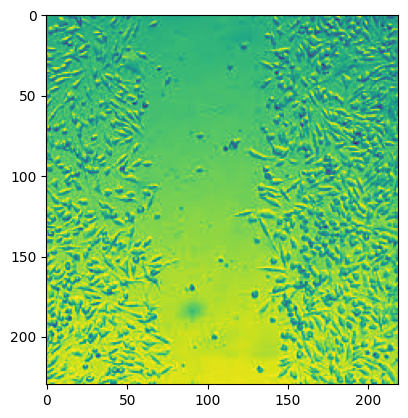

In [3]:
plt.imshow(gray_image)

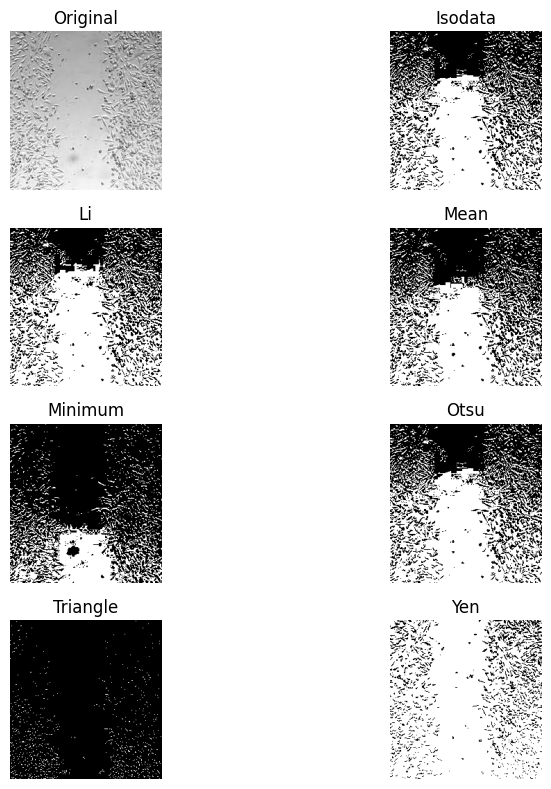

In [4]:
fig, ax = try_all_threshold(gray_image, figsize=(10, 8), verbose=False)
plt.show()

###### Please notice, that skimage.morphology.disk is a "2D structuring element", which can only be used with a "2D image", 
###### i.e. a grayscale image.



In [34]:
entropy_img = entropy(gray_image, disk(15))

/tmp/ipykernel_3753/1920505476.py:1: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  entropy_img = entropy(gray_image, disk(15))


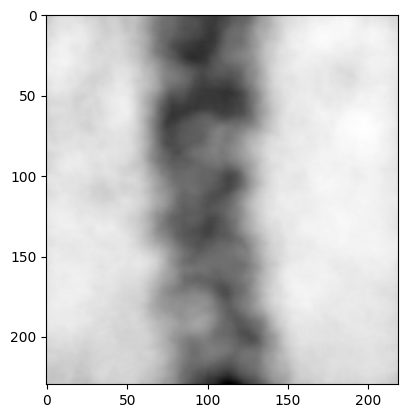

In [10]:
plt.imshow(entropy_img, cmap="gray")

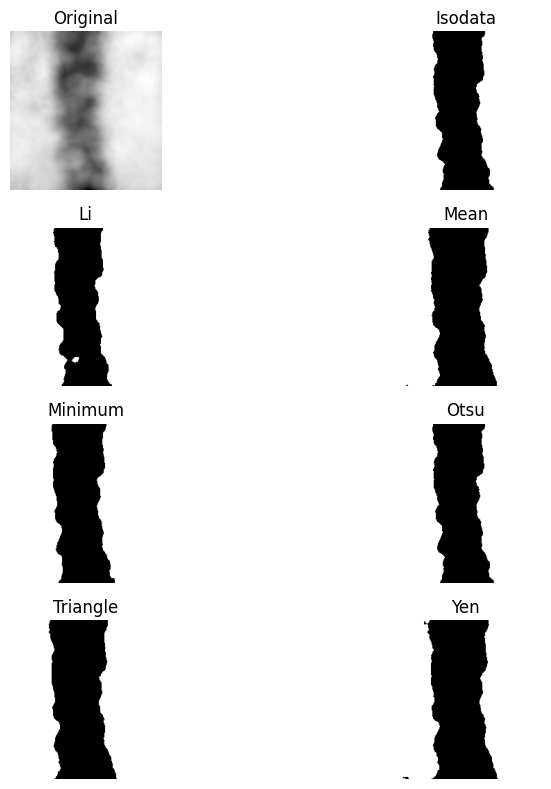

In [11]:
fig, ax = try_all_threshold(entropy_img, figsize=(10, 8), verbose=False)
plt.show()

In [12]:
from skimage.filters import threshold_otsu
thresh = threshold_otsu(entropy_img)
thresh

5.588372960445864

In [15]:
binary_img = entropy_img <= thresh
binary_img

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

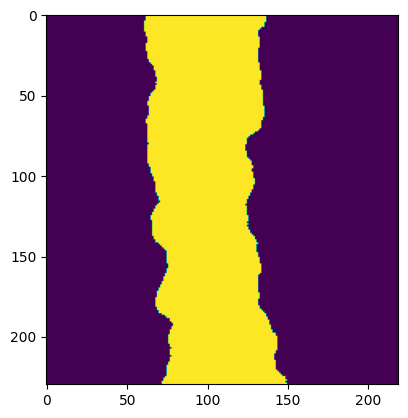

In [16]:
plt.imshow(binary_img)

In [24]:
print("Wounded area:", np.sum(binary_img==1))
print("Wounded area(%):", (np.sum(binary_img==1)*100)/(np.sum(binary_img==1)+np.sum(binary_img==0)))
print("Normal area:", np.sum(binary_img==0))

Wounded area: 14941
Wounded area(%): 29.662497518364106
Normal area: 35429


In [25]:
binary_img.shape

(230, 219)

In [26]:
img.shape

(230, 219, 3)

In [27]:
binary_img.shape[0]*binary_img.shape[1]

50370

In [28]:
14941+35429

50370